# Regresión Logística

## Juan David Mora Daza

## Paso 1: Análisis Exploratorio de los Datos (EDA)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv')


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Resumen Estadístico:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6991

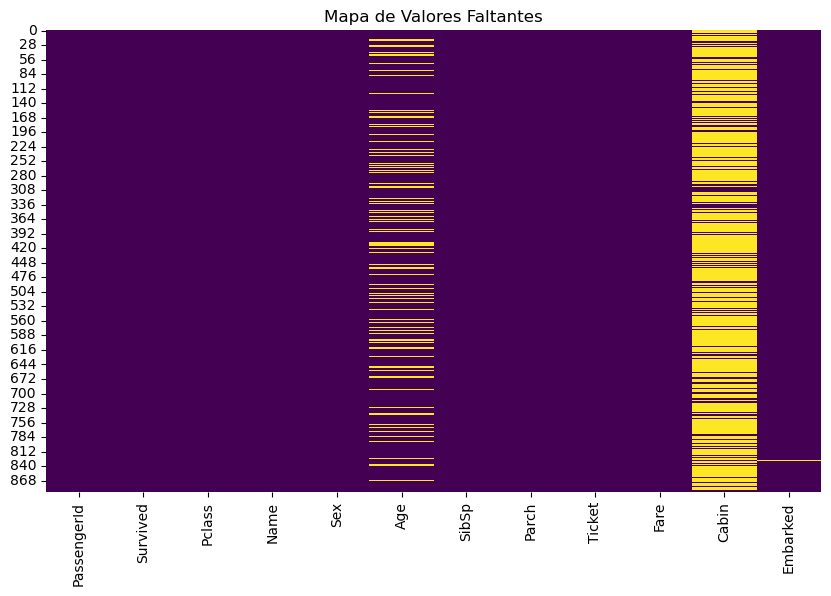

In [65]:
# Información general
print("Información del Dataset:")
print(data.info())

# Resumen estadístico
print("\nResumen Estadístico:")
print(data.describe())

# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Faltantes")
plt.show()


No hay valores faltantes en 'Age'.


C:\Users\juand\AppData\Local\Temp\ipykernel_11980\2854760734.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette='Set2')


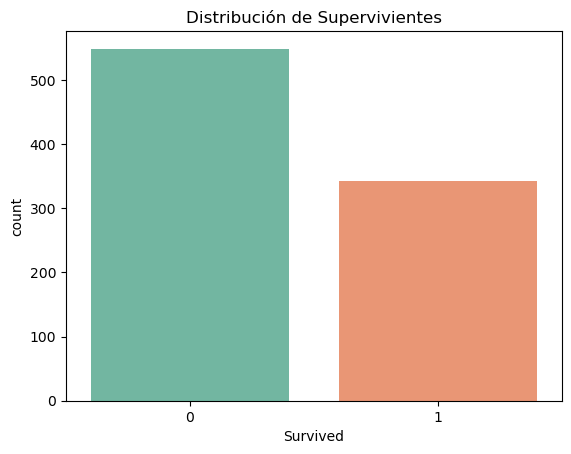

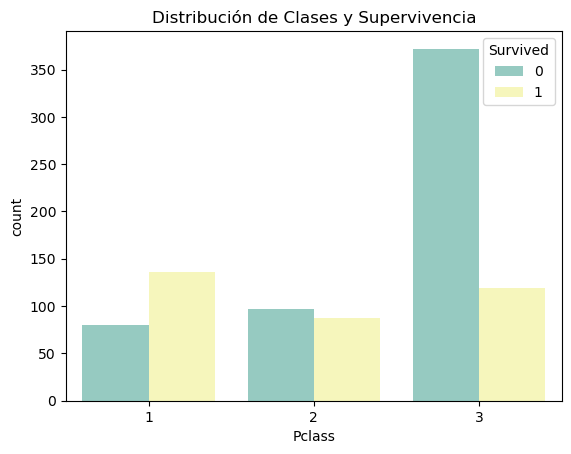

In [86]:
# Verificar valores faltantes en 'Age' antes de imputar
if data['Age'].isnull().sum() > 0:
    # Imputar valores faltantes con la mediana
    data['Age'].fillna(data['Age'].median(), inplace=True)
    print("Valores faltantes en 'Age' imputados con la mediana.")
else:
    print("No hay valores faltantes en 'Age'.")

# Visualización de variables categóricas (Survived, Pclass, Sex, Embarked)
sns.countplot(data=data, x='Survived', palette='Set2')
plt.title("Distribución de Supervivientes")
plt.show()

sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set3')
plt.title("Distribución de Clases y Supervivencia")
plt.show()


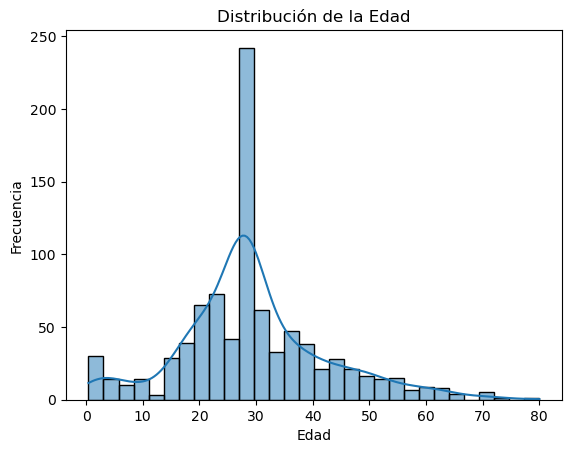

C:\Users\juand\AppData\Local\Temp\ipykernel_11980\281135104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Pclass', y='Fare', palette='cool')


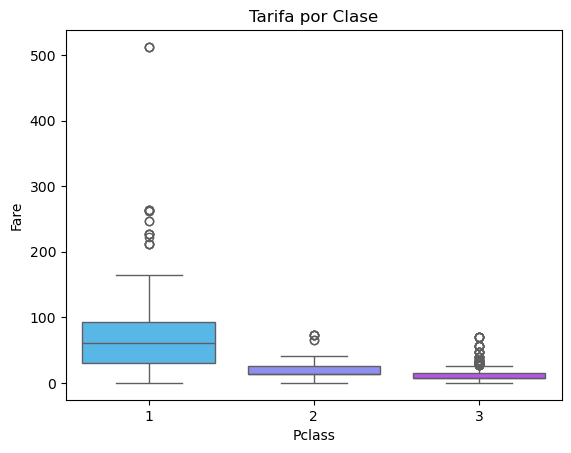

In [84]:
# Distribución de la edad
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre tarifa y clase
sns.boxplot(data=data, x='Pclass', y='Fare', palette='cool')
plt.title("Tarifa por Clase")
plt.show()

## Paso 2: Preprocesamiento de los Datos

In [69]:
# Imputar valores faltantes en 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Imputar valores faltantes en 'Embarked' si existe
if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Verificar y eliminar solo las columnas que existen
columns_to_drop = [col for col in ['PassengerId', 'Name', 'Ticket', 'Cabin'] if col in data.columns]
if columns_to_drop:
    data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Crear variables dummies para 'Sex' y 'Embarked' si existen
columns_to_dummies = [col for col in ['Sex', 'Embarked'] if col in data.columns]
if columns_to_dummies:
    data = pd.get_dummies(data, columns=columns_to_dummies, drop_first=True)

print("Datos después del preprocesamiento:")
print(data.head())


Datos después del preprocesamiento:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## Paso 3: Selección de Características

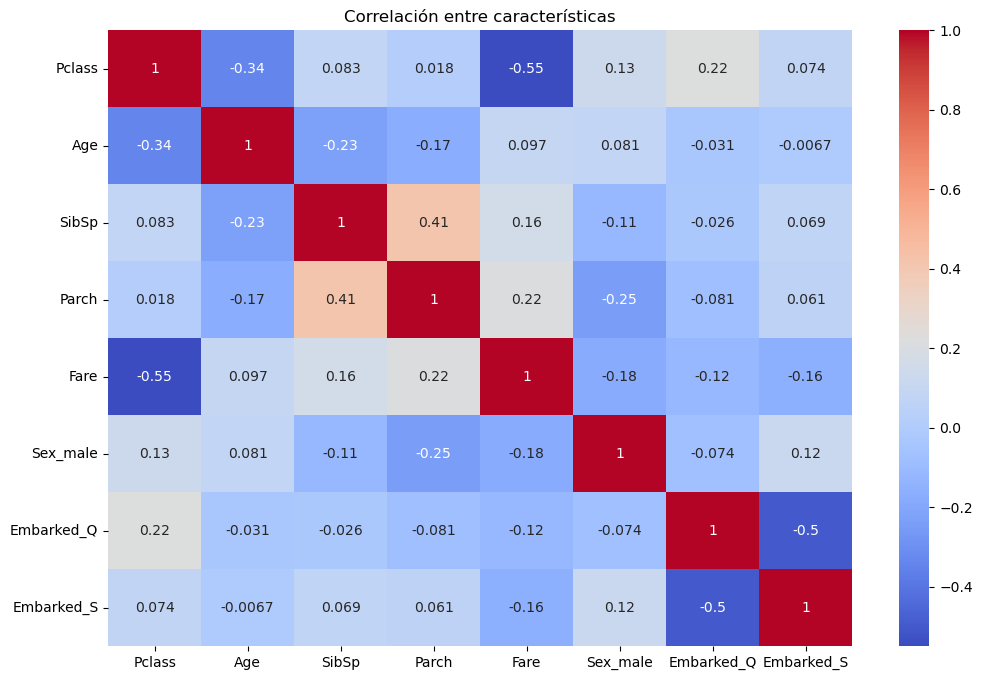

In [73]:
# Separar características (X) y la variable objetivo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Verificar la correlación entre las características
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre características")
plt.show()


## Paso 4: Dividir el Dataset en Train y Test

In [76]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (712, 8)
Tamaño del conjunto de prueba: (179, 8)


## Paso 5: Entrenar el Modelo de Regresión Logística

In [79]:
# Usar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


Precisión del modelo: 0.80
Matriz de confusión:
[[89 16]
 [20 54]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\juand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Paso 6: Evaluar el Desempeño del Modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



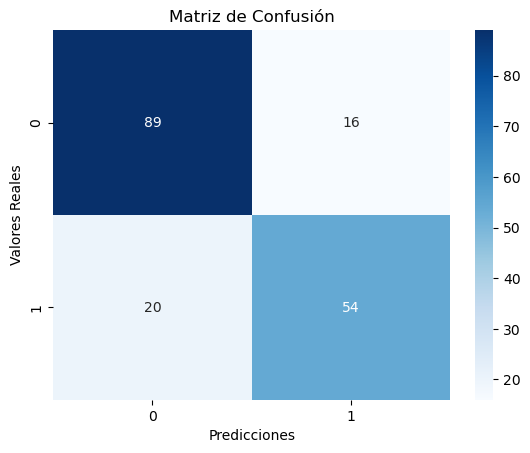

Precisión del Modelo: 79.89%


In [82]:
# Predicciones
y_pred = model.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del Modelo: {accuracy * 100:.2f}%")
